In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter(action = 'ignore', category = pd.errors.SettingWithCopyWarning)
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [2]:
df_true = pd.read_csv('True.csv')
df_fake = pd.read_csv('Fake.csv')

In [3]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
df_true['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [5]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
print(type(df_true))
print(type(df_fake))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [7]:
df_true['Label'] = 1
df_fake['Label'] = 0

In [8]:
df = pd.concat([df_true, df_fake] , ignore_index = True)

In [9]:
df = df.sample( frac = 1, random_state = 42). reset_index(drop = True)

In [10]:
df.head()

,title,text,subject,date,Label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0


In [11]:
missing_values = df.isnull().sum()
print('Missing_values : ',missing_values [missing_values > 0])
df = df.drop_duplicates()      
duplicate_values = df.duplicated().sum() 
print('remaining Duplicates :',duplicate_values)

Missing_values :  Series([], dtype: int64)
remaining Duplicates : 0


In [12]:
#df['dates'] = pd.to_datetime(df['date'], errors='coerce')

In [13]:
#df[df['dates'].isnull()].head(20)


In [14]:
df['dates'] = df['date']

In [15]:
import dateutil.parser 
def convert_date(date):
    if isinstance(date, str):
        try:
            return dateutil.parser.parse(date)
        except:
            return pd.NaT
    return pd.NaT
df['dates'] = df['dates'].apply(convert_date)

In [16]:
df

,title,text,subject,date,Label,dates
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0,2017-07-21
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0,2016-05-07
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0,2016-12-03
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1,2017-10-06
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0,2017-04-25
...,...,...,...,...,...,...
44892,New York protesters camp out at Goldman Sachs ...,NEW YORK (Reuters) - Dozens of protesters gath...,politicsNews,"January 18, 2017",1,2017-01-18
44894,Boiler Room #62 – Fatal Illusions,Tune in to the Alternate Current Radio Network...,Middle-east,"June 29, 2016",0,2016-06-29
44895,ATHEISTS SUE GOVERNOR OF TEXAS Over Display on...,I m convinced the Freedom From Religion group...,Government News,"Feb 27, 2016",0,2016-02-27
44896,Republican tax plan would deal financial hit t...,WASHINGTON (Reuters) - The Republican tax plan...,politicsNews,"November 2, 2017",1,2017-11-02


In [17]:
print(f'Total number of invalid after : {df['dates'].isnull().sum()}')
print('-'* 15)
df[df['dates'].isnull()].head(10)

Total number of invalid after : 10
---------------


,title,text,subject,date,Label,dates
13550,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,0,NaT
16730,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,0,NaT
18327,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,0,NaT
18825,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,0,NaT
20827,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,0,NaT
22439,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,0,NaT
26511,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,0,NaT
32368,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,0,NaT
43173,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,0,NaT
44358,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,0,NaT


In [18]:
df = df.dropna(subset=['dates'])
print(df['title'].count())
print(df['date'].count())

44679
44679


In [19]:
import re
from collections import Counter
from nltk.corpus import stopwords 
import nltk
nltk.download ('stopwords') 
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Aibell
[nltk_data]     bijesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
def text_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words =text.split()
    words = [word for word in words if word not in stop_words]
    return words
df.loc[:,'tokenized'] = df['text'].apply(text_tokenize)

In [21]:
df['tokenized'].head()

0    [donald, trump, white, house, chaos, trying, c...
1    [donald, trump, presumptive, gop, nominee, tim...
2    [mike, pence, huge, homophobe, supports, exgay...
3    [san, francisco, reuters, california, attorney...
4    [twisted, reasoning, comes, pelosi, days, espe...
Name: tokenized, dtype: object

In [22]:
df


,title,text,subject,date,Label,dates,tokenized
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0,2017-07-21,"[donald, trump, white, house, chaos, trying, c..."
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0,2016-05-07,"[donald, trump, presumptive, gop, nominee, tim..."
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0,2016-12-03,"[mike, pence, huge, homophobe, supports, exgay..."
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1,2017-10-06,"[san, francisco, reuters, california, attorney..."
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0,2017-04-25,"[twisted, reasoning, comes, pelosi, days, espe..."
...,...,...,...,...,...,...,...
44892,New York protesters camp out at Goldman Sachs ...,NEW YORK (Reuters) - Dozens of protesters gath...,politicsNews,"January 18, 2017",1,2017-01-18,"[new, york, reuters, dozens, protesters, gathe..."
44894,Boiler Room #62 – Fatal Illusions,Tune in to the Alternate Current Radio Network...,Middle-east,"June 29, 2016",0,2016-06-29,"[tune, alternate, current, radio, network, acr..."
44895,ATHEISTS SUE GOVERNOR OF TEXAS Over Display on...,I m convinced the Freedom From Religion group...,Government News,"Feb 27, 2016",0,2016-02-27,"[convinced, freedom, religion, group, atheists..."
44896,Republican tax plan would deal financial hit t...,WASHINGTON (Reuters) - The Republican tax plan...,politicsNews,"November 2, 2017",1,2017-11-02,"[washington, reuters, republican, tax, plan, u..."


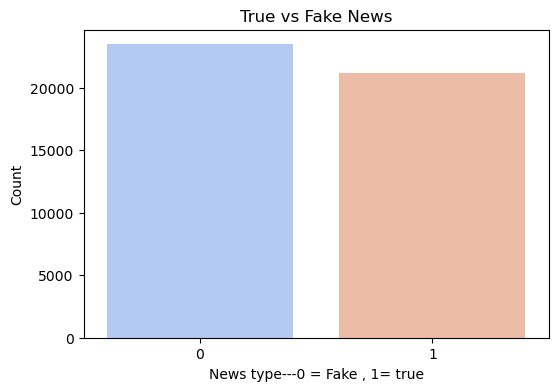

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(x= df['Label'], palette = 'coolwarm', hue= df['Label'], legend = False)
plt.title('True vs Fake News')
plt.xlabel('News type---0 = Fake , 1= true')
plt.ylabel('Count')
plt.show()

In [24]:
from tabulate import tabulate
true_news  = df.query('Label == 1')['tokenized'].explode().tolist()
fake_news  = df.query('Label == 0')['tokenized'].explode().tolist()

true_words_freq = Counter(true_news).most_common(20)
fake_words_freq = Counter(fake_news).most_common(20)

true_df = pd.DataFrame(true_words_freq, columns = ['true words', 'true count'])
fake_df = pd.DataFrame(fake_words_freq, columns = ['fake words', 'fake count'])

combined_df = pd.concat([true_df, fake_df], axis =1)
print( tabulate(combined_df, headers = 'keys', tablefmt = 'pretty'))


+----+------------+------------+------------+------------+
|    | true words | true count | fake words | fake count |
+----+------------+------------+------------+------------+
| 0  |    said    |   97844    |   trump    |   73933    |
| 1  |   trump    |   42117    |    said    |   31012    |
| 2  |     us     |   40671    |   people   |   25963    |
| 3  |   would    |   31164    | president  |   25585    |
| 4  |  reuters   |   28110    |   would    |   23426    |
| 5  | president  |   25272    |    one     |   22932    |
| 6  |   state    |   18557    |     us     |   22049    |
| 7  | government |   17708    |  clinton   |   18006    |
| 8  |   states   |   17408    |   obama    |   17813    |
| 9  |    new     |   16628    |    like    |   17620    |
| 10 |   house    |   16259    |   donald   |   17215    |
| 11 |    also    |   15752    |    also    |   15242    |
| 12 |   united   |   15351    |    new     |   14158    |
| 13 | republican |   15207    |    news    |   14125   

In [25]:
!pip install wordcloud

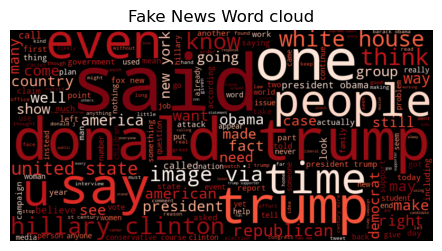

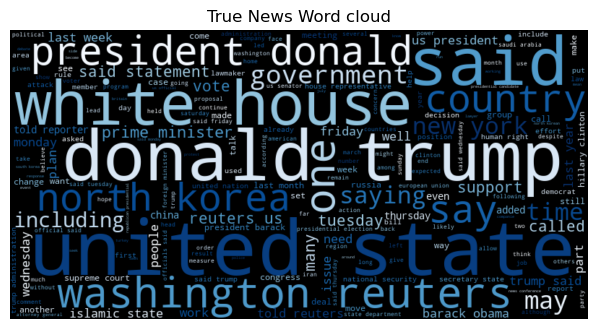

In [26]:
from wordcloud import WordCloud
fake_text = ' '.join(df.query("Label == 0")['tokenized'].explode().dropna().tolist())
true_text = ' '.join(df.query("Label == 1")['tokenized'].explode().dropna().tolist())

#creating a wordcloud
fake_wordcloud = WordCloud(width = 800, height = 400, background_color = 'black', colormap='Reds').generate(fake_text)
true_wordcloud = WordCloud(width = 800, height = 400, background_color = 'black', colormap='Blues').generate(true_text)

#plot creation
plt.figure(figsize =(12,5))
plt.subplot(1, 2, 1)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Fake News Word cloud')

plt.figure(figsize =(12,5))
plt.subplot(1, 2, 2)
plt.imshow(true_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('True News Word cloud')

plt.tight_layout()
plt.show()

# Using N-Gram

In [28]:
import nltk
from nltk.util import ngrams
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Aibell
[nltk_data]     bijesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
def get_top_trigrams (tokenized_text, n=20):
    trigram = [tuple(tokenized_text[i:i+3]) for i in range(len(tokenized_text)-2)]
    trigram_freq = Counter(trigram).most_common(n)
    return trigram_freq

#flatten the words to lists
true_news = df.query('Label == 1')['tokenized'].explode().dropna().tolist()

fake_news = df.query('Label == 0')['tokenized'].explode().dropna().tolist()

true_trigram = get_top_trigrams( true_news, n=50)
fake_trigram = get_top_trigrams( fake_news, n=50)

print('true_trigram : ', true_trigram[:5])
print('fake_trigram : ', fake_trigram[:5])

#common trigram avoided
true_tri_set = {t for t, _ in true_trigram}
fake_tri_set = {t for t, _ in fake_trigram}
common_trigram = true_tri_set & fake_tri_set

true_trigrams = [(f'{t[0]} {t[1]} {t[2]}', count) for t, count in true_trigram if t not in common_trigram][:20]
fake_trigrams = [(f'{t[0]} {t[1]} {t[2]}', count) for t, count in fake_trigram if t not in common_trigram][:20]

true_tri_df = pd.DataFrame(true_trigrams, columns=['true_trigram', 'true_count'])
fake_tri_df = pd.DataFrame(fake_trigrams, columns=['fake_trigram', 'fake_count'])

concat_trigram = pd.concat([true_tri_df, fake_tri_df], axis = 1)
print(concat_trigram)

true_trigram :  [(('president', 'donald', 'trump'), 4400), (('us', 'president', 'donald'), 2500), (('washington', 'reuters', 'us'), 2349), (('president', 'barack', 'obama'), 1986), (('president', 'donald', 'trumps'), 1404)]
fake_trigram :  [(('donald', 'j', 'trump'), 2114), (('st', 'century', 'wire'), 1904), (('j', 'trump', 'realdonaldtrump'), 1692), (('new', 'york', 'times'), 1474), (('black', 'lives', 'matter'), 1229)]
                    true_trigram  true_count             fake_trigram  \
0            us president donald        2500           donald j trump   
1          washington reuters us        2349          st century wire   
2        president donald trumps        1404  j trump realdonaldtrump   
3           reuters us president        1003       black lives matter   
4               white house said         955          news st century   
5        president barack obamas         906       featured image via   
6       us house representatives         776  president united s

In [30]:
from nrclex import NRCLex
import textblob

In [31]:
#exracting emotions
def get_emotion_text (text):
    emotion = NRCLex(text)
    return emotion.raw_emotion_scores

df['emotion_scores'] = df['text'].apply(get_emotion_text)
emotion_df = df['emotion_scores'].apply(pd.Series).fillna(0)

df = pd.concat([df.drop(columns = ['emotion_scores']), emotion_df], axis = 1)

df.head()

,title,text,subject,date,Label,dates,tokenized,anger,fear,negative,sadness,trust,disgust,surprise,positive,anticipation,joy
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0,2017-07-21,"[donald, trump, white, house, chaos, trying, c...",11.0,14.0,23.0,6.0,9.0,11.0,2.0,7.0,1.0,1.0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0,2016-05-07,"[donald, trump, presumptive, gop, nominee, tim...",6.0,7.0,10.0,6.0,6.0,3.0,4.0,19.0,6.0,4.0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0,2016-12-03,"[mike, pence, huge, homophobe, supports, exgay...",8.0,9.0,12.0,9.0,5.0,5.0,1.0,10.0,6.0,4.0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1,2017-10-06,"[san, francisco, reuters, california, attorney...",0.0,3.0,1.0,1.0,4.0,0.0,0.0,6.0,2.0,1.0
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0,2017-04-25,"[twisted, reasoning, comes, pelosi, days, espe...",3.0,2.0,5.0,1.0,2.0,2.0,0.0,5.0,0.0,1.0


In [32]:
df.columns


Index(['title', 'text', 'subject', 'date', 'Label', 'dates', 'tokenized',
       'anger', 'fear', 'negative', 'sadness', 'trust', 'disgust', 'surprise',
       'positive', 'anticipation', 'joy'],
      dtype='object')

In [33]:
def classify_emotion (row):
    emotion_rows = row[['anger', 'fear', 'negative', 'sadness', 'trust', 'disgust', 'surprise', 'positive', 'anticipation', 'joy']]
    dominant_emotion = emotion_rows.idxmax()
    return dominant_emotion
df['Dominant Emotion'] = df.apply(classify_emotion, axis = 1)
df.head(25)

,title,text,subject,date,Label,dates,tokenized,anger,fear,negative,sadness,trust,disgust,surprise,positive,anticipation,joy,Dominant Emotion
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0,2017-07-21,"[donald, trump, white, house, chaos, trying, c...",11.0,14.0,23.0,6.0,9.0,11.0,2.0,7.0,1.0,1.0,negative
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0,2016-05-07,"[donald, trump, presumptive, gop, nominee, tim...",6.0,7.0,10.0,6.0,6.0,3.0,4.0,19.0,6.0,4.0,positive
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0,2016-12-03,"[mike, pence, huge, homophobe, supports, exgay...",8.0,9.0,12.0,9.0,5.0,5.0,1.0,10.0,6.0,4.0,negative
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1,2017-10-06,"[san, francisco, reuters, california, attorney...",0.0,3.0,1.0,1.0,4.0,0.0,0.0,6.0,2.0,1.0,positive
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0,2017-04-25,"[twisted, reasoning, comes, pelosi, days, espe...",3.0,2.0,5.0,1.0,2.0,2.0,0.0,5.0,0.0,1.0,negative
5,"As private lawyer, Trump high court pick was f...",WASHINGTON (Reuters) - As a lawyer in private ...,politicsNews,"February 1, 2017",1,2017-02-01,"[washington, reuters, lawyer, private, practic...",19.0,21.0,24.0,7.0,31.0,7.0,2.0,48.0,14.0,7.0,positive
6,Yemeni Salafist imam killed in Aden: sources,ADEN (Reuters) - A Salafist imam was shot dead...,worldnews,"October 28, 2017",1,2017-10-28,"[aden, reuters, salafist, imam, shot, dead, gu...",6.0,5.0,7.0,3.0,3.0,1.0,3.0,6.0,2.0,1.0,negative
7,FBI says witnesses in U.S. probe into Malaysia...,KUALA LUMPUR (Reuters) - Potential witnesses t...,worldnews,"September 6, 2017",1,2017-09-06,"[kuala, lumpur, reuters, potential, witnesses,...",14.0,23.0,31.0,11.0,12.0,5.0,1.0,23.0,10.0,3.0,negative
8,An Easy To Read Chart Shows How Bernie Sanders...,The goal of socialism is communism. -Vladimi...,politics,"Feb 24, 2016",0,2016-02-24,"[goal, socialism, communism, vladimir, lenin, ...",1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,fear
9,MMA FIGHTER JAKE SHIELDS Embarrasses Cowards I...,Opposing views and beliefs has much of this co...,politics,"Feb 4, 2017",0,2017-02-04,"[opposing, views, beliefs, much, country, heat...",13.0,18.0,20.0,12.0,8.0,6.0,3.0,13.0,4.0,4.0,negative


In [34]:
emotional_threshold = df[['anger', 'sadness', 'trust', 'fear', 'disgust', 'surprise', 'joy' ]].quantile(0.90)
def emotion_classification (row):
    if row['anger']> emotional_threshold['anger'] or row['fear'] > emotional_threshold['fear']:
         return 'Highly Emotional'
    elif row['sadness']> emotional_threshold['sadness'] or row['disgust'] > emotional_threshold['disgust']:
        return 'highly drepressing'
    elif row['surprise']> emotional_threshold['surprise'] or row['trust'] > emotional_threshold['trust']:
        return 'shocking'
    elif row['joy']> emotional_threshold['joy']:
        return 'happy'
    else :
        return 'Neutral'
df['Emotional category'] = df.apply(emotion_classification, axis =1)


In [61]:
emotion_classified = df[['title', 'Emotional category', 'Dominant Emotion', 'Label']].copy()
emotion_classified.columns =['title', 'Emotion Type', 'Main Emotion', 'Label']
emotion_classified.head(10)

,title,Emotion Type,Main Emotion,Label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,highly drepressing,negative,0
1,Failed GOP Candidates Remembered In Hilarious...,Neutral,positive,0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Neutral,negative,0
3,California AG pledges to defend birth control ...,Neutral,positive,1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Neutral,negative,0
5,"As private lawyer, Trump high court pick was f...",Highly Emotional,positive,1
6,Yemeni Salafist imam killed in Aden: sources,Neutral,negative,1
7,FBI says witnesses in U.S. probe into Malaysia...,Highly Emotional,negative,1
8,An Easy To Read Chart Shows How Bernie Sanders...,Neutral,fear,0
9,MMA FIGHTER JAKE SHIELDS Embarrasses Cowards I...,Neutral,negative,0


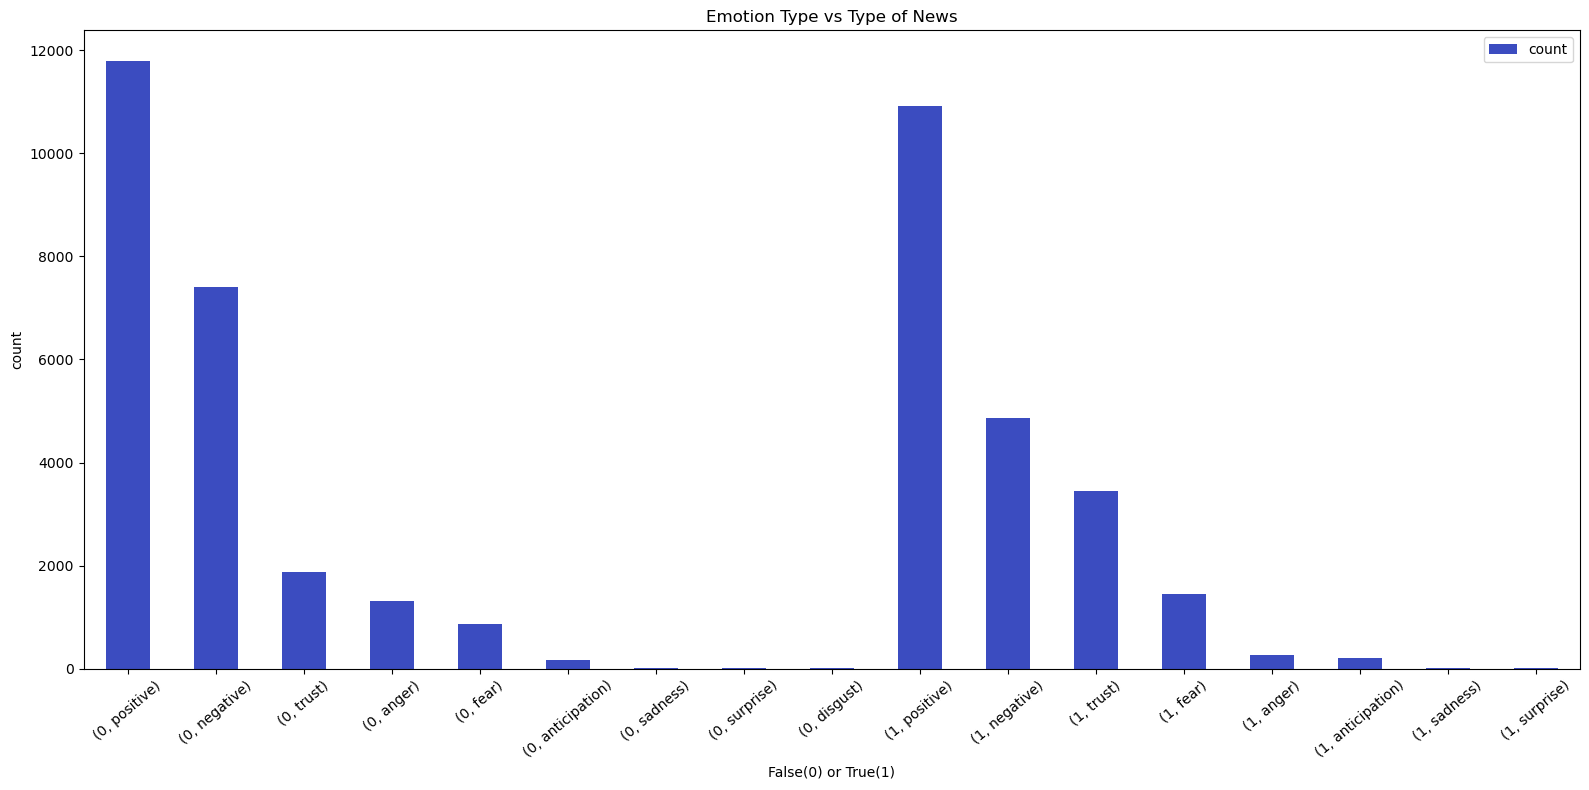

In [59]:
emotion_label = emotion_classified.groupby('Label')['Main Emotion'].value_counts()
emotion_label.plot(kind = 'bar', figsize = (16,8), colormap = 'coolwarm')
plt.title('Emotion Type vs Type of News')
plt.xlabel('False(0) or True(1)')
plt.ylabel('count')
plt.xticks(rotation = 40)
plt.legend()
plt.tight_layout()
plt.show()

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [173]:
rf = RandomForestClassifier(n_estimators = 100, 
                            max_depth = 10,
                            min_samples_split =10,
                            min_samples_leaf = 4,
                            random_state = 42)
x_terms = ['anger', 'fear', 'negative', 'sadness', 'trust', 'disgust', 'surprise', 'positive', 'anticipation', 'joy']
X = df[x_terms]
y = df['Label']

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [177]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [179]:
y_pred = rf.predict(X_test)

In [181]:
accuracy = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(f'Accuracy : {accuracy*100}')
print('-'*20)
print('Classification Report :')
print(f'{cr}')

Accuracy : 70.8034914950761
--------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      4683
           1       0.69      0.69      0.69      4253

    accuracy                           0.71      8936
   macro avg       0.71      0.71      0.71      8936
weighted avg       0.71      0.71      0.71      8936



In [183]:
print("Train Accuracy:", accuracy_score(y_train, rf.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, rf.predict(X_test)))

Train Accuracy: 0.7449290770220742
Test Accuracy: 0.708034914950761


In [205]:
def predict_news(text):
    emotion = NRCLex(text).raw_emotion_scores
    input_data = pd.DataFrame([emotion], columns=X_train.columns).fillna(0)
    prediction = rf.predict(input_data)[0]
    return 'Fake News' if prediction == 0 else 'True News'

news_text = 'Breaking: The government has issued a new lockdown policy due to rising cases.'
print(predict_news(news_text))

Fake News


In [209]:
news_text2 = 'The government promised to provide child care policies'
print(predict_news(news_text2))

True News
